## Task-1
### Author -Thulasi V

# Task Purpose: Prediction using Supervised ML

● Problem statement:
Predict the percentage of an student based on the no. of study hours. 
What will be predicted score if a student studies for 9.25 hrs/ day?

# Step 1 - Importing the libraries

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt  
%matplotlib inline
print("all the libraries Imported successfully.")

all the libraries Imported successfully.


# Step 2 - Data Collection

In [3]:
#Load the Dataset in jupyter notbook 
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print("Data is Sucessfully Uploaded")

Data is Sucessfully Uploaded


# Step 3 - EDA 

In [7]:
#to See the first 10 rows of the data
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#to See the last 5 rows of the data
df.tail() 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
#to See the random 5 rows from dataframe
df.sample(5)

,Hours,Scores
0,2.5,21
5,1.5,20
11,5.9,62
9,2.7,25
12,4.5,41


In [36]:
#to find the count of column and count of rows
df.shape

(25, 2)

In [9]:
df.shape[0] #axis=0 give me the count of rows

25

In [10]:
df.shape[1] #axis=1 give me the count of columns

2

In [13]:
df.ndim #to know the dimension of data frame

2

In [12]:
df.size #to know the actual size of data frames, like total values in df

50

In [37]:
#Check for Column name, nun-null-count and datatypes
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [38]:
#Check for null values
pd.isnull(df).sum() 

Hours     0
Scores    0
dtype: int64

<Axes: >

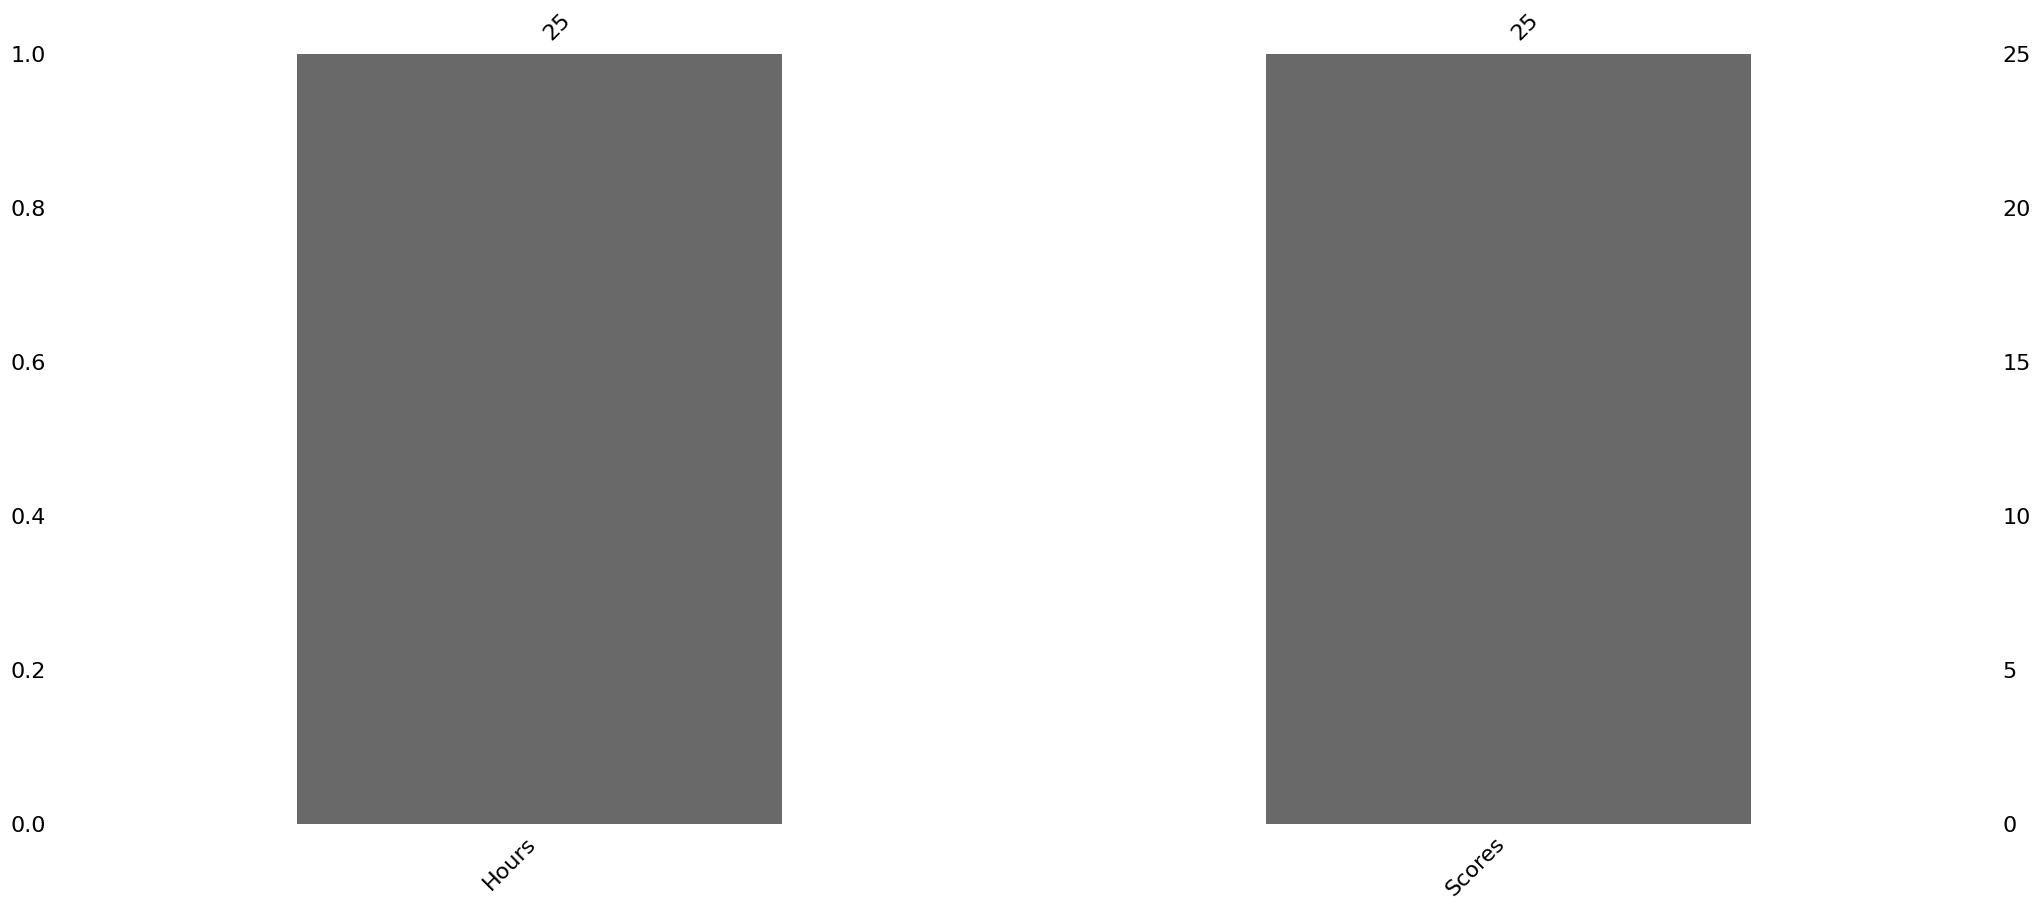

In [4]:
import missingno as msno
msno.bar(df) # Generate a bar column chart to visually represent the distribution of missing values within the dataset."
#After run the code we can clearly see there is no missing value in DF

In [26]:
df.nunique() #this function is count unique values of each columns.

Hours     23
Scores    23
dtype: int64

In [9]:
#to know the discription of the data in the data frame(df)
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
df['Scores'].value_counts(normalize=True) #it will show the percentage of value is repeated 
#It is evident from the data that a score of 30 is associated with a 12% contribution, indicating that 12% of students achieved this particular score.

Scores
30    0.12
21    0.04
41    0.04
76    0.04
35    0.04
54    0.04
69    0.04
67    0.04
24    0.04
95    0.04
17    0.04
42    0.04
62    0.04
47    0.04
85    0.04
25    0.04
81    0.04
60    0.04
88    0.04
20    0.04
75    0.04
27    0.04
86    0.04
Name: proportion, dtype: float64

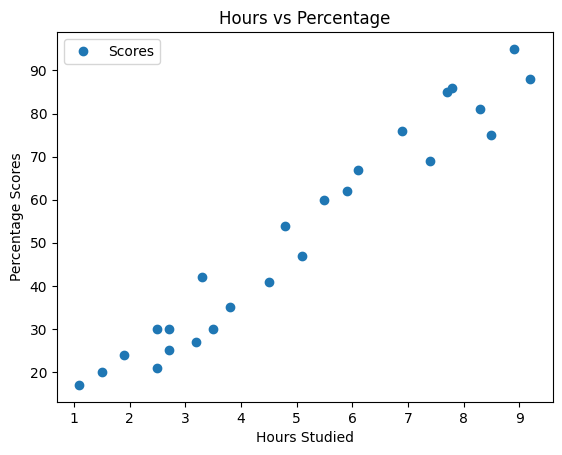

In [11]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scores')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Simple Liner Regression

In [12]:
x = df.iloc[:, :-1].values  # independent variable
y = df.iloc[:, 1].values    # dependent variable

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

Splitting data such that 20% data will be used for testing(model evaluation) and 80% data for model training.

# Model Training

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


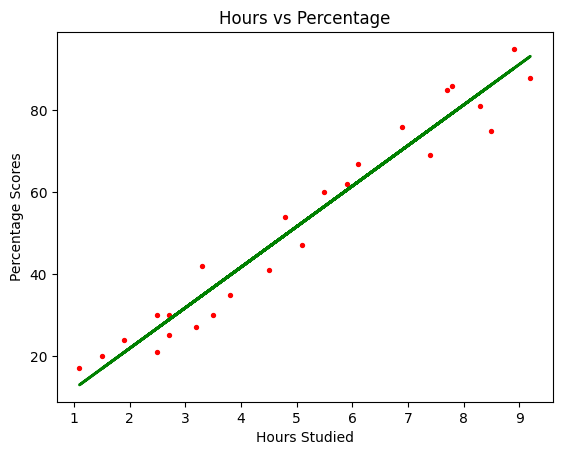

In [27]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,c='red', s=8)
plt.plot(x, line,c='green', lw=2)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scores')  
plt.show()


# Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [22]:
print(x_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
y_pred = regressor.predict(x_test) # Predicting the scores

In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 4.183859899002975
MSE: 21.598769307217406
RMSE: 4.647447612100367
r2_score: 0.9454906892105355


# Final Prediction - Percentage of a student studing for 9.25 hours/day

In [33]:
regressor.fit(x, y)  # trainingg Model on 100% data for more accurate prediction.
predicted_score = regressor.predict([[9.25]])
predicted_score

array([92.90985477])

In [34]:
print('Predicted score if a student studies for 9.25 hrs/ day: ',predicted_score[0].round(2))

Predicted score if a student studies for 9.25 hrs/ day:  92.91


# Thank You!